In [56]:
from IPython.display import Image
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator 
import numpy as np
import graphviz
from graphviz import Digraph
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz

In [57]:
# learn a line segment

In [58]:
# generate data for a line segment [0.5, 1.5) (y=1) and 
# for points outside the line segent [1.5, 2.0] (y=0)

from sklearn import datasets

iris = datasets.load_iris()

X = iris.data[:, [0,1,2,3]]
y = iris.target


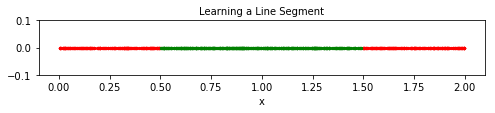

In [59]:
# plot data points
plt.close('all')
plt.figure(figsize=(8, 1))
plt.title('Learning a Line Segment', fontsize='medium')
plt.xlabel('x')
plt.ylabel('')
plt.scatter(x = X1[y1==0, 0], y=y0[y1==0], color='red', label='0', s=5)
plt.scatter(x = X1[y1==1, 0], y=y0[y1==1], color='green', label='1', s=5)
plt.axis(range=1, aspect=1)
plt.xlim(-0.1,2.1)
plt.ylim(-0.1,0.1)
plt.show()

In [60]:
# split data into 50% training and 50% test data

X_train, X_test, y_train, y_test = train_test_split(
         X, y, test_size=0.30, random_state=0)

if (npts==20):
    print(np.sort(X_train.transpose()))

In [82]:
# Fit for various depth trees
s = ' '
MaxDepth = 10
Errors = np.zeros((MaxDepth,2))

print ('Max Depth, Training, Test')

for i in range(0,MaxDepth):
    tree = DecisionTreeClassifier(criterion='entropy', max_depth=i+1, random_state=0)
    tree.fit(X_train, y_train)

    X_combined = np.vstack((X_train, X_test))
    y_combined = np.hstack((y_train, y_test))

    # optional outputs
    z = tree.apply(X_combined)
    #print(z)
    dp = tree.decision_path(X_combined)
    #print (dp)
    
    Errors[i,0] = 1 - tree.score(X_train,y_train)
    Errors[i,1] = 1 - tree.score(X_test,y_test)
    print(i+1, 8*s, "{0:.3}".format(Errors[i,0]), 5*s, "{0:.3}".format(Errors[i,1]))


Max Depth, Training, Test
1          0.305       0.4
2          0.0381       0.0889
3          0.019       0.0222
4          0.0       0.0222
5          0.0       0.0222
6          0.0       0.0222
7          0.0       0.0222
8          0.0       0.0222
9          0.0       0.0222
10          0.0       0.0222


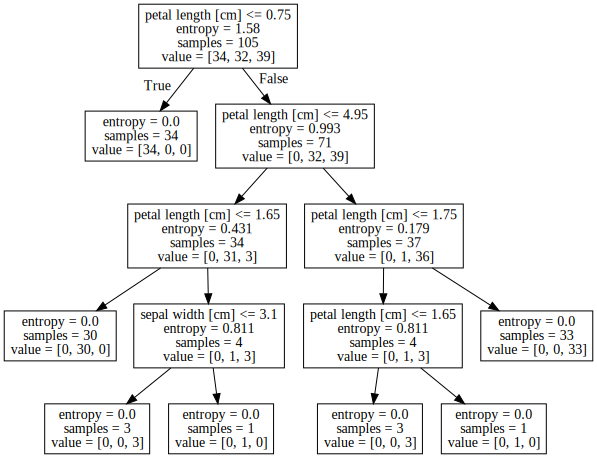

In [81]:
# plot the final decision gree
export_graphviz(tree, out_file='T1.dot', feature_names=['sepal length [cm]', 'sepal width [cm]',
                                                        'petal length [cm]', 'petal length [cm]'])
with open('T1.dot') as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

In [ ]:
# Changing the impurity from 'gini' to 'entorpy' made little to no difference in the result

<function matplotlib.pyplot.show>

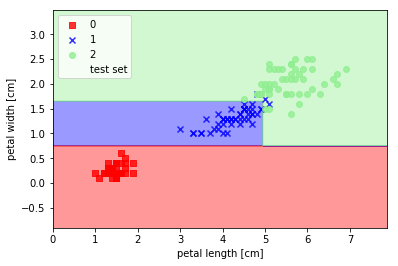

In [53]:
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

def plot_decision_regions(X, y, classifier,
                          test_idx=None, resolution=0.02):
# setup marker generator and color map

    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])
    
    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())
    
    # plot all samples
    X_test, y_test = X[test_idx, :], y[test_idx]
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],
                    alpha=0.8, c=cmap(idx),
                    marker=markers[idx], label=cl)
    # highlight test samples
    if test_idx:
        X_test, y_test = X[test_idx, :], y[test_idx]
        plt.scatter(X_test[:, 0], X_test[:, 1], c='',
                    alpha=1.0, linewidth=1, marker='o',
                    s=55, label='test set')
        
iris = datasets.load_iris()
X = iris.data[:, [2,3]]
y = iris.target

# Split data into training and test sets
from sklearn.cross_validation import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# Build a decision tree classifier

from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)

tree.fit(X_train, y_train)
X_combined = np.vstack((X_train, X_test))
y_combined = np.hstack((y_train, y_test))

plot_decision_regions(X_combined, y_combined, 
                      classifier=tree, test_idx=range(105,150))
plt.xlabel('petal length [cm]')
plt.ylabel('petal width [cm]')
plt.legend(loc='upper left')
plt.show

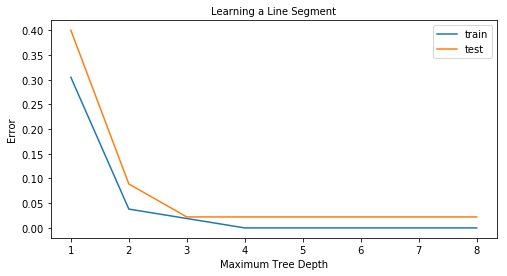

In [46]:
# plot errors by tree depth    
  
plt.close('all')
fig, ax = plt.subplots(nrows=1, ncols=1, figsize = (8,4))
ax.set_xlabel('Maximum Tree Depth')
ax.set_ylabel('Error')
ax.set_title('Learning a Line Segment', fontsize ='medium')
ax.xaxis.set_major_locator(MaxNLocator(integer=True))
ax.plot(np.arange(1,MaxDepth+1),Errors[:,0], label='train')
ax.plot(np.arange(1,MaxDepth+1),Errors[:,1], label='test')
ax.legend(loc='upper right', fontsize='medium')
plt.show() 
